## Observations and Insights

## Dependencies and starter code

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [31]:
# Combine the data into a single dataset
merge_table = pd.merge(study_results,mouse_metadata,on="Mouse ID", how="left")
merge_table 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen
groupedby_reg = merge_table.groupby(['Drug Regimen'])
reg_median= groupedby_reg['Tumor Volume (mm3)'].median()
reg_mean = groupedby_reg['Tumor Volume (mm3)'].mean()
reg_std = groupedby_reg['Tumor Volume (mm3)'].std()
reg_var=groupedby_reg['Tumor Volume (mm3)'].var()
reg_sem=groupedby_reg['Tumor Volume (mm3)'].sem()

summery_table = pd.DataFrame({'Tumor Volume Median':reg_median,'Tumor Volume Mean':reg_mean,'Tumor Volume Std':reg_std,
                              'Tumor Volume Variance':reg_var,'Tumor Volume SEM':reg_sem})
summery_table

,Tumor Volume Median,Tumor Volume Mean,Tumor Volume Std,Tumor Volume Variance,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,4.994774,24.947764,0.329346
Ceftamin,51.776157,52.591172,6.268188,39.290177,0.469821
Infubinol,51.820584,52.884795,6.567243,43.128684,0.492236
Ketapril,53.698743,55.235638,8.279709,68.553577,0.603860
Naftisol,52.509285,54.331565,8.134708,66.173479,0.596466
Placebo,52.288934,54.033581,7.821003,61.168083,0.581331
Propriva,50.854632,52.322552,6.507770,42.351070,0.512884
Ramicane,40.673236,40.216745,4.846308,23.486704,0.320955
Stelasyn,52.431737,54.233149,7.710419,59.450562,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

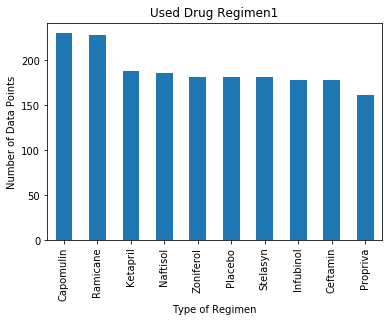

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = merge_table['Drug Regimen'].value_counts()
counts = counts.plot(kind="bar",title="Used Drug Regimen1")
counts.set_xlabel("Type of Regimen")
counts.set_ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

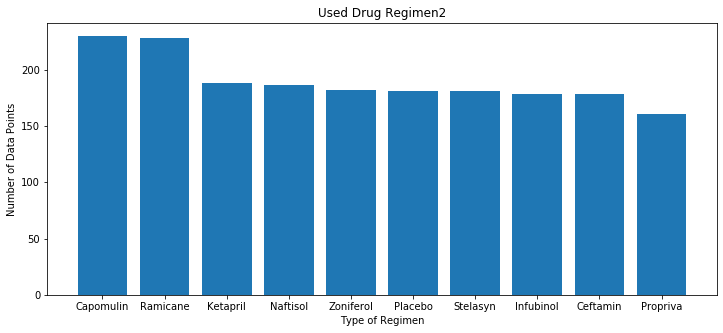

In [59]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = merge_table['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.title("Used Drug Regimen2")
plt.xlabel("Type of Regimen")
plt.ylabel("Number of Data Points")
#plt.rcParams["figure.figsize"] =[12,5]

## Pie plots

Text(0.5, 1.0, 'Gender Distribution1')

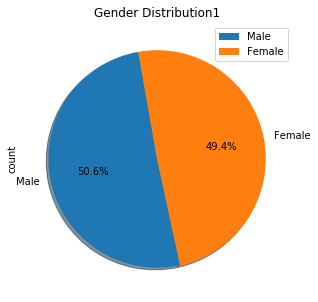

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender =merge_table['Sex'].value_counts()
gender_df = pd.DataFrame({'count':[gender['Male'], gender['Female']]},
                   index = ['Male', 'Female'])
plot = gender_df.plot.pie(y='count',figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)
plot.set_title('Gender Distribution1')

Text(0.5, 1.0, 'Gender Distribution2')

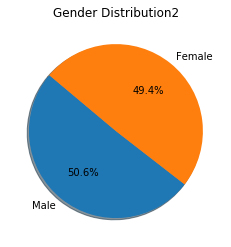

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1, 0, 0, 0)
plt.pie(gender, labels=['Male','Female'], autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Gender Distribution2')

## Quartiles, outliers and boxplots

In [37]:
# Calculate the final tumor volume of !each mouse! across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, Ceftamin.
groupby_mouse = merge_table.groupby(['Mouse ID']).max()
groupby_mouse = groupby_mouse.reset_index()
groupby_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [38]:
#capomulin
capomulin = groupby_mouse.loc[groupby_mouse["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
quartiles1= capomulin.quantile([.25,.5,.75])
lowerq = quartiles1[0.25]
upperq = quartiles1[0.75]
iqr1 = upperq-lowerq
lower_bound1 = lowerq - (1.5*iqr1)
upper_bound1 = upperq + (1.5*iqr1)
#ramicane
ramicane = groupby_mouse.loc[groupby_mouse["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
quartiles2= ramicane.quantile([.25,.5,.75])
lowerq = quartiles2[0.25]
upperq = quartiles2[0.75]
iqr2 = upperq-lowerq
lower_bound2 = lowerq - (1.5*iqr2)
upper_bound2 = upperq + (1.5*iqr2)
#infubinol
infubinol = groupby_mouse.loc[groupby_mouse["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
quartiles3= infubinol.quantile([.25,.5,.75])
lowerq = quartiles3[0.25]
upperq = quartiles3[0.75]
iqr3 = upperq-lowerq
lower_bound3 = lowerq - (1.5*iqr3)
upper_bound3 = upperq + (1.5*iqr3)
#ceftamin
ceftamin = groupby_mouse.loc[groupby_mouse["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
quartiles4= ceftamin.quantile([.25,.5,.75])
lowerq = quartiles4[0.25]
upperq = quartiles4[0.75]
iqr4 = upperq-lowerq
lower_bound4 = lowerq - (1.5*iqr4)
upper_bound4 = upperq + (1.5*iqr4)

print(f"The interquartile range of capomulin is: {iqr1}")
print(f"The interquartile range of ramicane is: {iqr2}")
print(f"The interquartile range of infubinol is: {iqr3}")
print(f"The interquartile range of ceftamin is: {iqr4}")

The interquartile range of capomulin is: 1.7490055199999972
The interquartile range of ramicane is: 1.3438323700000012
The interquartile range of infubinol is: 11.477135160000003
The interquartile range of ceftamin is: 15.577752179999997


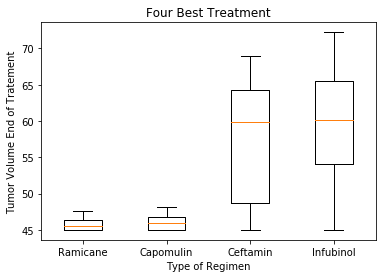

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Ramicane_table=groupby_mouse.loc[groupby_mouse['Drug Regimen']=='Ramicane']
Capomulin_table=groupby_mouse.loc[groupby_mouse['Drug Regimen']=='Capomulin']
Ceftamin_table=groupby_mouse.loc[groupby_mouse['Drug Regimen']=='Ceftamin']
Infubinol_table=groupby_mouse.loc[groupby_mouse['Drug Regimen']=='Infubinol']

times = (Ramicane_table['Tumor Volume (mm3)'], Capomulin_table['Tumor Volume (mm3)'],
         Ceftamin_table['Tumor Volume (mm3)'], Infubinol_table['Tumor Volume (mm3)'] )
fig1, ax1 = plt.subplots()
ax1.set_title('Four Best Treatment')
ax1.set_xlabel("Type of Regimen")
ax1.set_ylabel('Tumor Volume End of Tratement')
ax1.boxplot(times)
plt.xticks([1, 2, 3, 4], ['Ramicane', 'Capomulin', 'Ceftamin','Infubinol'])
plt.show()

## Line and scatter plots

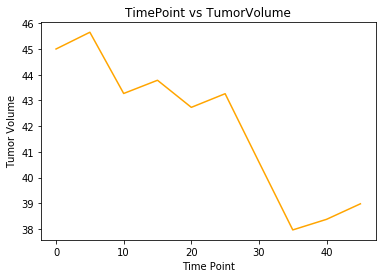

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = merge_table.loc[merge_table['Drug Regimen']=='Capomulin']
timepoint = Capomulin.loc[merge_table['Mouse ID']=='b128']
plt.plot(timepoint['Timepoint'], timepoint['Tumor Volume (mm3)'], color="Orange")
plt.title('TimePoint vs TumorVolume')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.show()

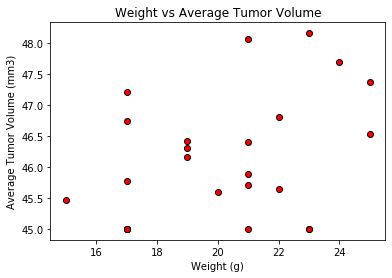

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_c = groupby_mouse.loc[groupby_mouse['Drug Regimen']=='Capomulin']
mouse_weight = mouse_c['Weight (g)']
avg_volume = Capomulin_table.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
plt.scatter(mouse_weight,avg_volume, marker="o", facecolors="red", edgecolors="black")
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen
x_values = mouse_weight
y_values = avg_volume
correlation = st.pearsonr(x_values,y_values)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.39


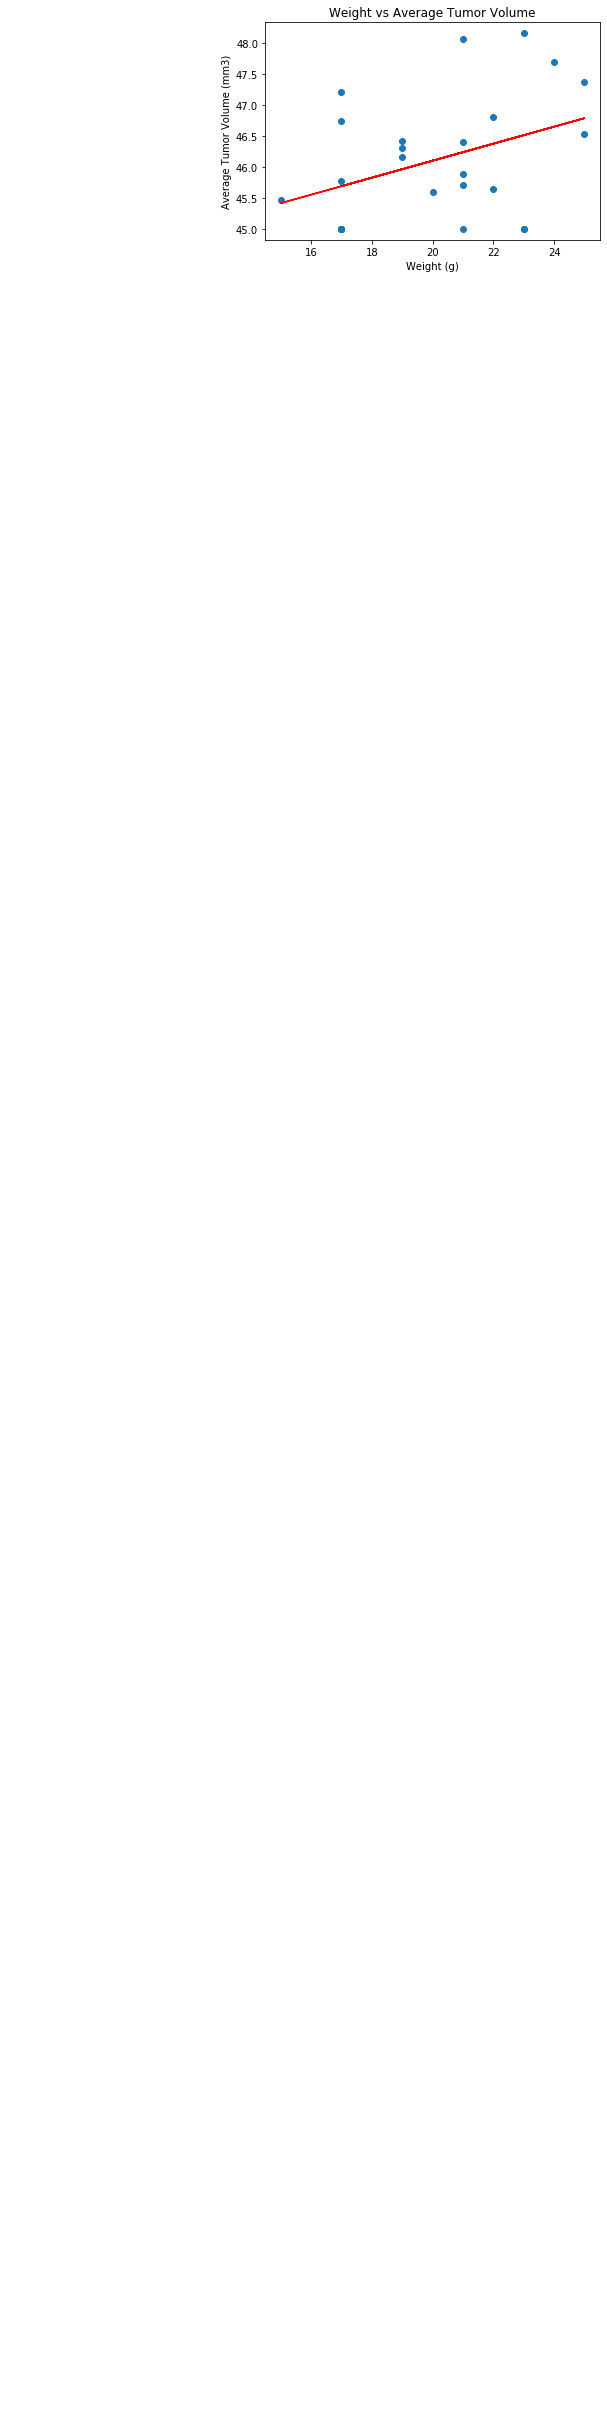

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# 3 observations

- The interquartile range of ceftamin and infubinol are much larger than capomulin and ramicane.

- In general, a mouse's tumor volume will decrease as the increase of time on treating with Capomulin.

- The relationship between mouse weight and average tumor volume for the Capomulin regimen are very weak.
